#Import Libraries

In [1]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

import library library yang diperlukan nantinya untuk pembuatan model

#Exploratory Data Analysis

##Load Dataset

In [2]:
# URL Google Drive
users_url = 'https://drive.google.com/uc?id=1Ppo-eHXxPf_SsmIar7lcxVFB7dT3Y3dC'
ratings_url = 'https://drive.google.com/uc?id=1y7uCmxZpnITE701PJDTfOtz6ZXoJEgKi'
books_url = 'https://drive.google.com/uc?id=1JC_aDsDWmFcDPLmEmCNgJ_tyYfg6xBA5'

# Mengunduh file
gdown.download(users_url, 'Users.csv', quiet=False)
gdown.download(ratings_url, 'Ratings.csv', quiet=False)
gdown.download(books_url, 'Books.csv', quiet=False)

# Membaca file CSV menggunakan Pandas
users_df = pd.read_csv('Users.csv')
ratings_df = pd.read_csv('Ratings.csv')
books_df = pd.read_csv('Books.csv')

# Menampilkan beberapa baris dari masing-masing DataFrame
print("Users DataFrame:")
print(users_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nBooks DataFrame:")
print(books_df.head())

Downloading...
From: https://drive.google.com/uc?id=1Ppo-eHXxPf_SsmIar7lcxVFB7dT3Y3dC
To: /content/Users.csv
100%|██████████| 11.0M/11.0M [00:00<00:00, 34.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1y7uCmxZpnITE701PJDTfOtz6ZXoJEgKi
To: /content/Ratings.csv
100%|██████████| 22.6M/22.6M [00:00<00:00, 204MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JC_aDsDWmFcDPLmEmCNgJ_tyYfg6xBA5
To: /content/Books.csv
100%|██████████| 73.3M/73.3M [00:00<00:00, 291MB/s]


Users DataFrame:
   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

Ratings DataFrame:
   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

Books DataFrame:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

  

<ipython-input-2-81d6dad3fb2e>:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


import dataset dan check apakah dataset berhasil di import menggunakan function head()

##Users Variabel

In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


check informasi user dataset. terdapat 3 kolom(user-id, location, dan age) dan 278853 baris data

In [4]:
print('Banyak User :' , len(users_df['User-ID'].unique()))
print('Location users :', users_df['Location'].unique())
print('rentang umur users :', users_df['Age'].unique())

Banyak User : 278858
Location users : ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']
rentang umur users : [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 

check data kolom dari user dataset

In [5]:
users_df['Age'].isnull().sum()

110762

check missing values kolom age

In [6]:
users_df.dropna(subset=['Age'], inplace=True)

In [7]:
users_df['Age'].isnull().sum()

0

hapus missing values

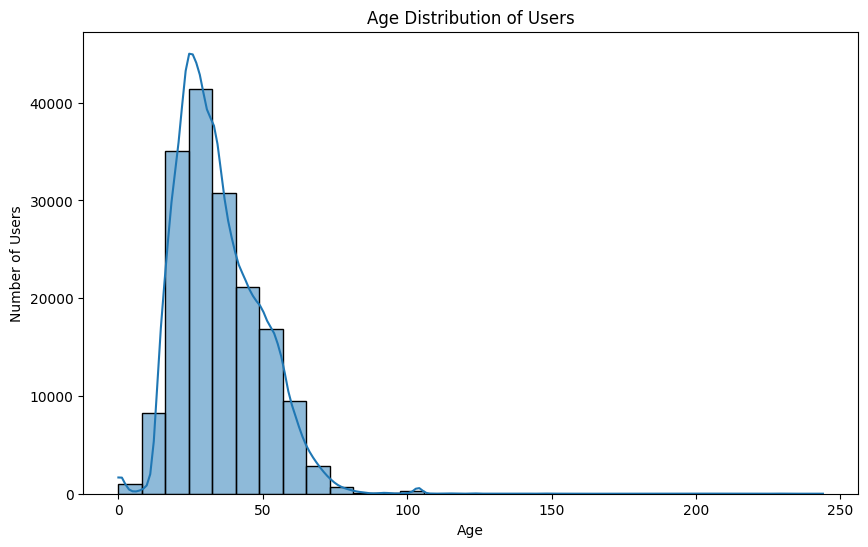

In [8]:
# Visualize Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(users_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

menampilkan peta penyebaran umur dari users yang me-rating buku. user paling banyak berada di kisaran 20-50 tahun

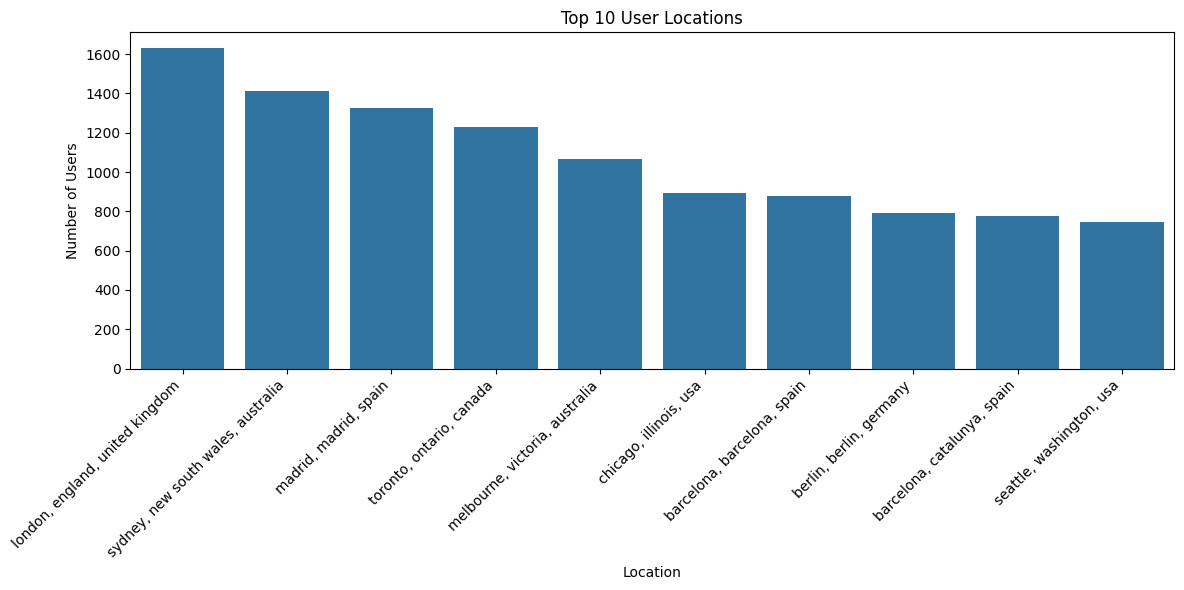

In [9]:
# Visualize Top 10 Locations
top_locations = users_df['Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 User Locations')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

memperlihatkan top 10 daerah users. menunjukkan bahwa mayoritas user yang memberi rating berada di daerah eropa

##Ratings Variabel

In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


check informasi rating dataset. terdapat 3 kolom(user-id, book-id, dan rating) dan 1149780 baris data

In [11]:
print('Jumalh Jenis Buku yang dirating :', len(ratings_df['ISBN'].unique()))

Jumalh Jenis Buku yang dirating : 340556


check jumlah unique value dari ISBN

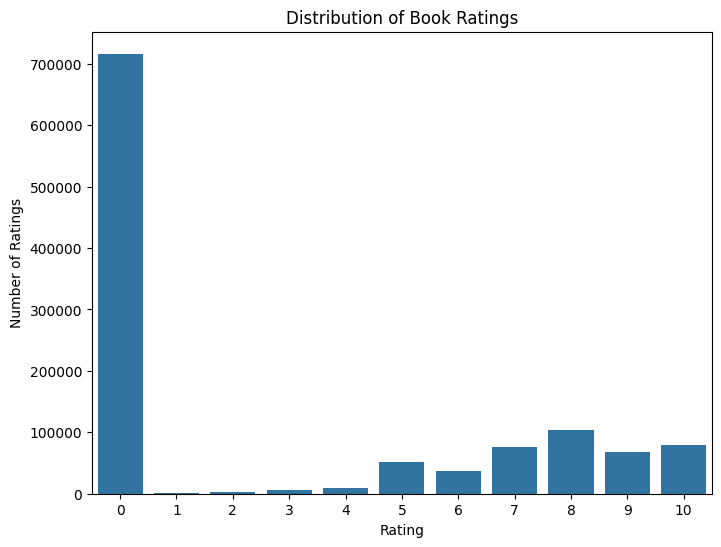

In [12]:
# Visualize Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Book-Rating', data=ratings_df)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

memerplihatkan penyebaran rating buku. dapat terlihat bahwa banyak buku yang memiliki rating 0. disusul dengan rating 8 dan 10

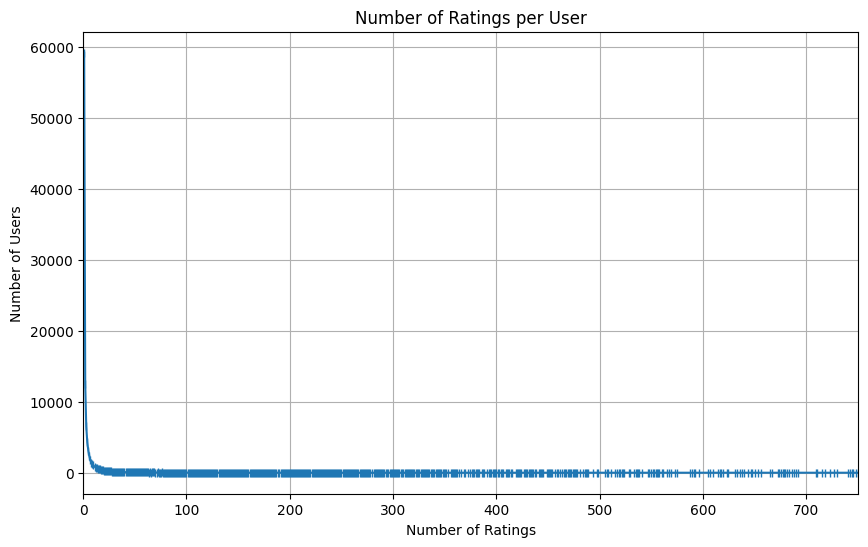

In [13]:
# Menghitung jumlah rating per pengguna
ratings_per_user = ratings_df.groupby('User-ID')['Book-Rating'].count()
# Menghitung frekuensi dari jumlah rating
ratings_count = ratings_per_user.value_counts().sort_index()

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(ratings_count.index, ratings_count.values, marker='|')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.xlim(0, 750)
plt.grid()
plt.show()

memvisualisasikan distribusi jumlah rating yang diberikan oleh pengguna dalam dataset. mayoritas user cuma menulis sekitar < 50 rating. kebanyakan user memberi rating hanya sekali saja.

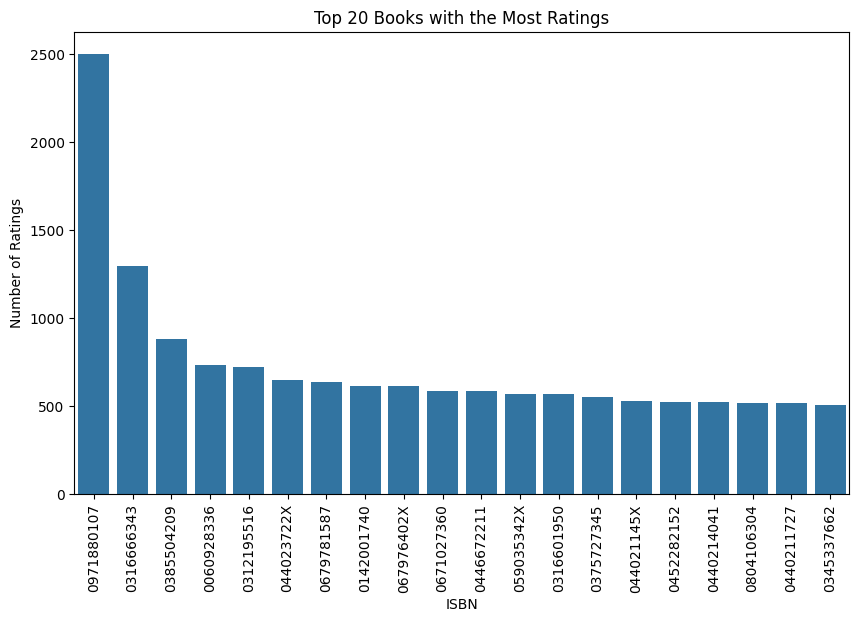

In [14]:
# Analyze the relationship between rating and ISBN
plt.figure(figsize=(10, 6))
rating_counts = ratings_df['ISBN'].value_counts().head(20)
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Top 20 Books with the Most Ratings')
plt.xlabel('ISBN')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

memperlihatkan relasi antar isbn dan ratings. dan memperlihatkan buku mana saja yang mendapatkan jumlah rating terbanyak.

##Books Variabel

In [15]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


check informasi books dataset. terdapat 11 kolom dan 2193 baris data

In [16]:
print('jumlah judul buku :', len(books_df['Book-Title'].unique()))
print('jumlah penerbit buku :', len(books_df['Publisher'].unique()))
print('jumlah pengarang buku :', len(books_df['Book-Author'].unique()))
print('Tahun terbit buku-buku :', books_df['Year-Of-Publication'].unique())

jumlah judul buku : 242135
jumlah penerbit buku : 16808
jumlah pengarang buku : 102023
Tahun terbit buku-buku : [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945'

check data kolom books_df. jenis buku bervariasi dari banyak pengarang, banyak penerbit, dan banyak tahun terbit buku

In [17]:
# Convert 'Year-Of-Publication' to numeric, coercing errors to NaN
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Now, you can safely convert to int, with NaNs remaining as NaNs
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('Int64') # Use 'Int64' for nullable integer type

print(books_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271357 non-null  Int64 
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: Int64(1), object(7)
memory usage: 16.8+ MB
None


mengubah data tahun penerbitan buku menjadi int untuk mempermudah analisis

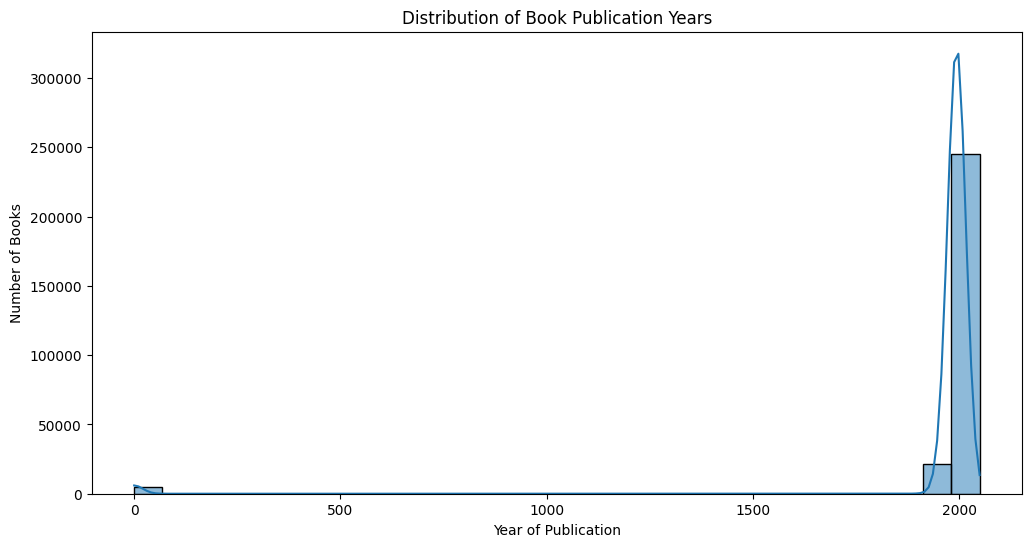

In [18]:
# Visualize the distribution of book publication years
plt.figure(figsize=(12, 6))
sns.histplot(books_df['Year-Of-Publication'], bins=30, kde=True)
plt.title('Distribution of Book Publication Years')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.show()

memperlihatkan penyebaran data tahun penerbitan buku. memperlihatkan bahwa dataset memiliki data banyak buku yang diterbitkan di sekitar tahun 2000

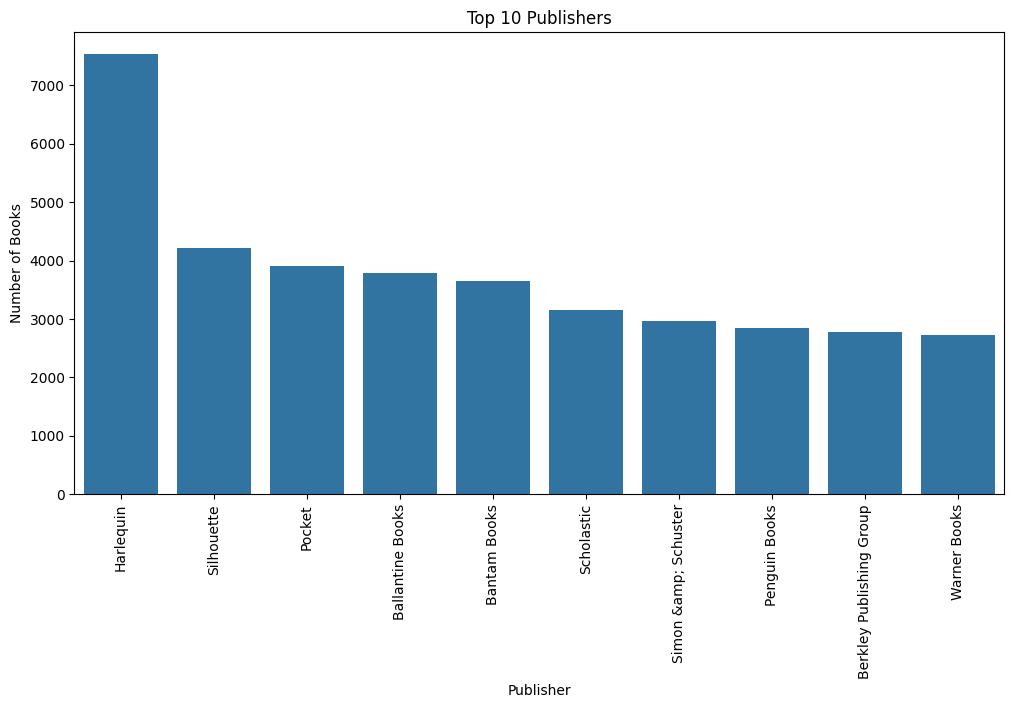

In [19]:
# Visualize top publishers
top_publishers = books_df['Publisher'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

memperlihatkan penyebaran data publisher dengan menampilkan top 10 publisher yang menerbitkan buku terbanyak. terlihat bahwa harlequin memiliki buku yang paling banyak diterbitkan

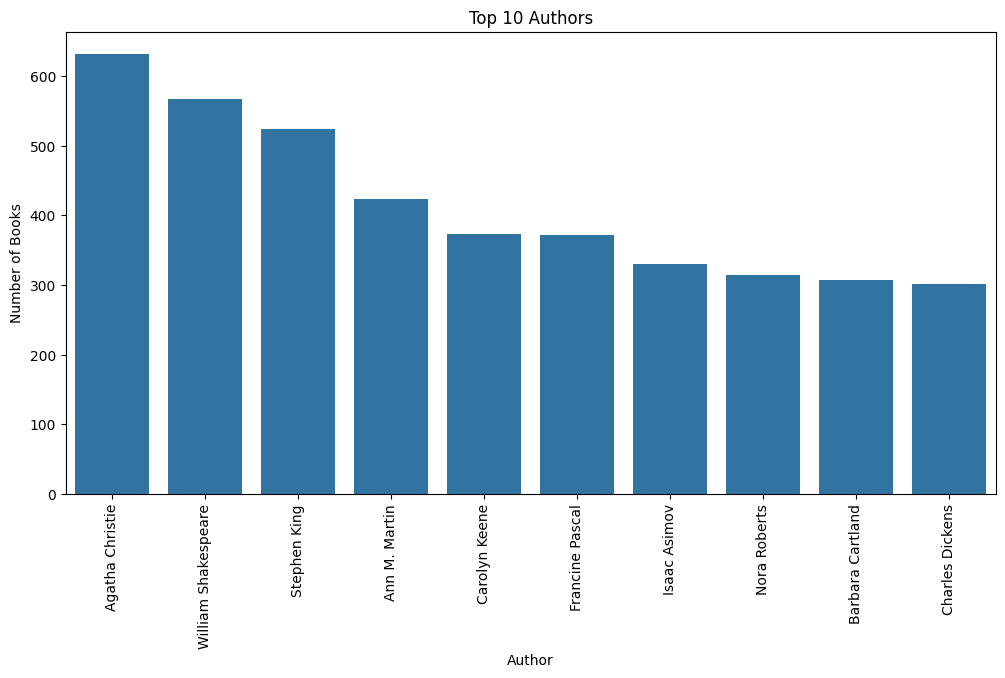

In [20]:
# Visualize top authors
top_authors = books_df['Book-Author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.title('Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

memvisualisasikan top 10 author dengan buku terbanyak. agatha christie merupakan author yang memiliki buku terbanyak berdasarkan dataset

#Data Preprocessing

In [21]:
ratings_books_df = pd.merge(ratings_df, books_df, on='ISBN', how='inner')

# Merge the result with users dataframe
merged_df = pd.merge(ratings_books_df, users_df, on='User-ID', how='inner')

merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0
3,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,"paris, n/a, france",37.0
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0


menggabungkan dataset menjadi 1

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753301 entries, 0 to 753300
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              753301 non-null  int64  
 1   ISBN                 753301 non-null  object 
 2   Book-Rating          753301 non-null  int64  
 3   Book-Title           753301 non-null  object 
 4   Book-Author          753299 non-null  object 
 5   Year-Of-Publication  753299 non-null  Int64  
 6   Publisher            753299 non-null  object 
 7   Image-URL-S          753301 non-null  object 
 8   Image-URL-M          753301 non-null  object 
 9   Image-URL-L          753299 non-null  object 
 10  Location             753301 non-null  object 
 11  Age                  753301 non-null  float64
dtypes: Int64(1), float64(1), int64(2), object(8)
memory usage: 69.7+ MB


pengecekan info dataset setelah penggabungan

In [23]:
merged_df.shape

(753301, 12)

#Data Preparation

##Handling Missing Values

In [24]:
merged_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,2
Year-Of-Publication,2
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,2


In [25]:
# Drop missing values in columns other than 'Age'
merged_df = merged_df.dropna(subset=['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'Location', 'User-ID', 'Book-Rating'])
merged_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


##Handling Duplicate Data

In [26]:
merged_df.duplicated().sum()

# Drop duplicates (if any)
merged_df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
merged_df.duplicated().sum()

0

In [27]:
merged_df.shape

(753295, 12)

##Handling Outlier

In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753295 entries, 0 to 753300
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              753295 non-null  int64  
 1   ISBN                 753295 non-null  object 
 2   Book-Rating          753295 non-null  int64  
 3   Book-Title           753295 non-null  object 
 4   Book-Author          753295 non-null  object 
 5   Year-Of-Publication  753295 non-null  Int64  
 6   Publisher            753295 non-null  object 
 7   Image-URL-S          753295 non-null  object 
 8   Image-URL-M          753295 non-null  object 
 9   Image-URL-L          753295 non-null  object 
 10  Location             753295 non-null  object 
 11  Age                  753295 non-null  float64
dtypes: Int64(1), float64(1), int64(2), object(8)
memory usage: 75.4+ MB


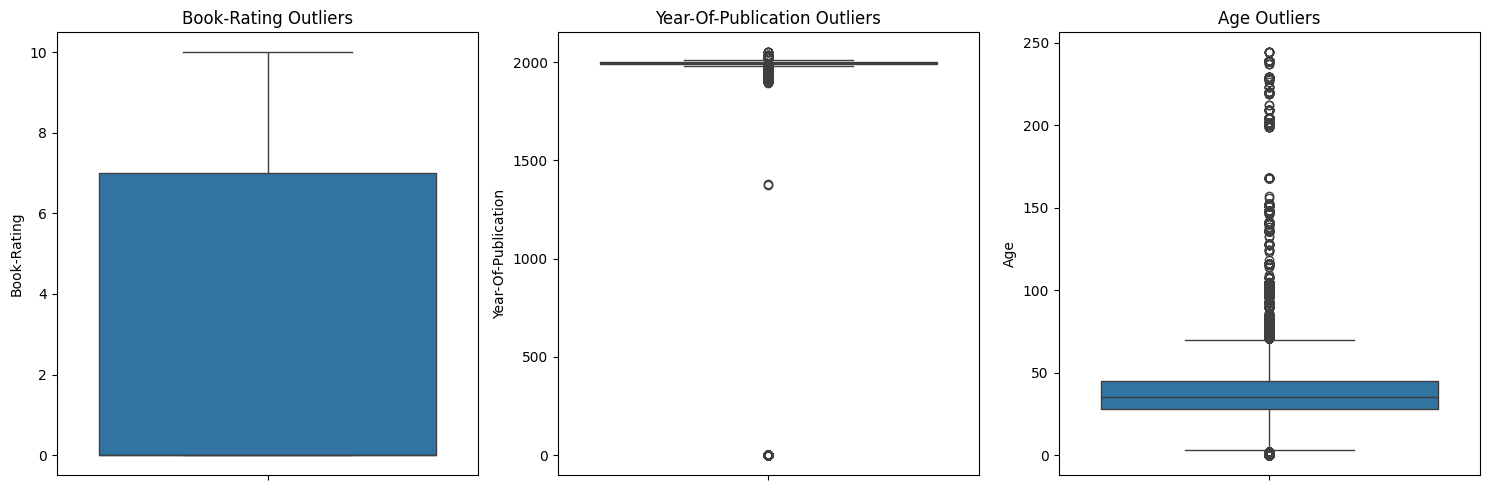

In [29]:
# Check and visualize outliers using boxplots for 'Book-Rating', 'Year-Of-Publication', and 'Age'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=merged_df['Book-Rating'])
plt.title('Book-Rating Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(y=merged_df['Year-Of-Publication'])
plt.title('Year-Of-Publication Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(y=merged_df['Age'])
plt.title('Age Outliers')

plt.tight_layout()
plt.show()


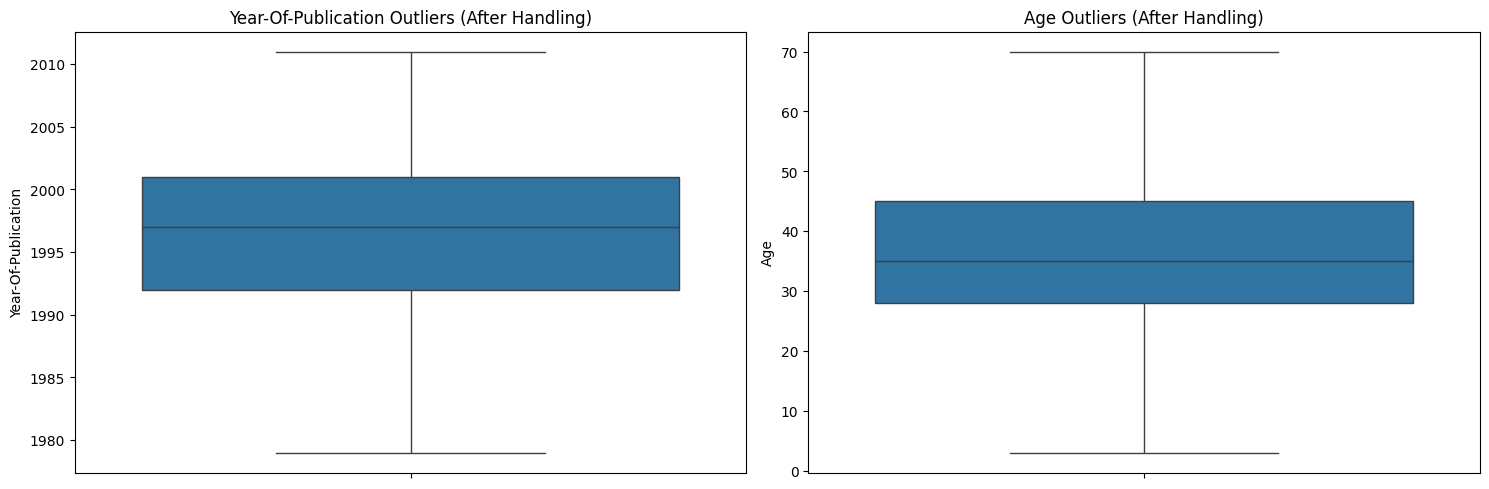

In [30]:
# Calculate IQR for 'Age'
Q1_age = merged_df['Age'].quantile(0.25)
Q3_age = merged_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Filter out outliers for 'Age'
merged_df = merged_df[~((merged_df['Age'] < lower_bound_age) | (merged_df['Age'] > upper_bound_age))]

# Calculate IQR for 'Year-Of-Publication'
Q1_year = merged_df['Year-Of-Publication'].quantile(0.25)
Q3_year = merged_df['Year-Of-Publication'].quantile(0.75)
IQR_year = Q3_year - Q1_year
lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

# Filter out outliers for 'Year-Of-Publication'
merged_df = merged_df[~((merged_df['Year-Of-Publication'] < lower_bound_year) | (merged_df['Year-Of-Publication'] > upper_bound_year))]

# After outlier handling, you might want to recheck the distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=merged_df['Year-Of-Publication'])
plt.title('Year-Of-Publication Outliers (After Handling)')

plt.subplot(1, 2, 2)
sns.boxplot(y=merged_df['Age'])
plt.title('Age Outliers (After Handling)')

plt.tight_layout()
plt.show()


In [31]:
merged_df.shape

(712898, 12)

#Model Development dengan Content Based Filtering

In [32]:
# Group data by 'Book-Title' and aggregate relevant columns
grouped_df = merged_df.groupby('Book-Title').agg({
    'Book-Author': 'first',  # Keep the first author
    'Year-Of-Publication': 'first',
    'Publisher': 'first',
    'Book-Rating': 'mean',  # Calculate average rating
    'User-ID': 'count'  # Count number of ratings
}).reset_index()

# Filter out books with less than a certain number of ratings (adjust threshold as needed)
min_ratings_threshold = 5
filtered_df = grouped_df[grouped_df['User-ID'] >= min_ratings_threshold]

# Sort by average rating (optional)
filtered_df = filtered_df.sort_values(by='Book-Rating', ascending=False)

# Reset index after filtering and sorting
filtered_df.reset_index(drop=True, inplace=True)

print(filtered_df.head())
filtered_df.shape


                                  Book-Title          Book-Author  \
0            Flame Of Recca (Flame Of Recca)       Nobuyuki Anzai   
1                   Dinosaurs: A Celebration          Steve White   
2  The Selected Poetry of Rainer Maria Rilke   RAINER MARIA RILKE   
3      Shambhala: Sacred Path of the Warrior      CHOGYAM TRUNGPA   
4                          Prometheus Rising  Robert Anton Wilson   

   Year-Of-Publication                     Publisher  Book-Rating  User-ID  
0                 2003                       VIZ LLC    10.000000        5  
1                 1997  Client Distribution Services    10.000000        5  
2                 1989                       Vintage    10.000000        5  
3                 1995                     Shambhala     9.833333        6  
4                 1992       New Falcon Publications     9.800000        5  


(27758, 6)

In [33]:
filtered_df['Book-Rating'].nunique()

3044

In [34]:
# Create a TF-IDF vectorizer to convert text data into numerical vectors
tfidf = TfidfVectorizer(stop_words='english')

# Combine relevant text columns into a single column for TF-IDF vectorization
filtered_df['combined_features'] = filtered_df['Book-Author'] + ' ' + filtered_df['Publisher']

# Fit and transform the combined features to create TF-IDF vectors
tfidf_matrix = tfidf.fit_transform(filtered_df['combined_features'])

# Calculate the cosine similarity between books based on their TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [35]:
# Function to get book recommendations based on book title
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the book that matches the title
    idx = filtered_df[filtered_df['Book-Title'] == title].index[0]

    # Get the pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return filtered_df['Book-Title'].iloc[book_indices]

In [36]:
get_recommendations('Harry Potter and the Prisoner of Azkaban (Book 3)')

,Book-Title
795,Harry Potter and the Prisoner of Azkaban (Book 3)
956,Harry Potter and the Order of the Phoenix (Boo...
1458,Harry Potter and the Chamber of Secrets Postca...
1837,Harry Potter and the Chamber of Secrets (Book 2)
17972,Harry Potter Schoolbooks: Quidditch Through th...
792,Harry Potter and the Goblet of Fire (Book 4)
8006,Harry Potter and the Prisoner of Azkaban (Harr...
1969,"Harry Potter and the Goblet of Fire (Book 4, A..."
339,Harry Potter y el prisionero de Azkaban
16451,Harry Potter y la Ã?rden del FÃ©nix


#Model Development dengan Collaborative Filtering

In [37]:
# 1.  User and Item Filtering:
#     a.  Filter out users with very few ratings:
user_rating_counts = merged_df['User-ID'].value_counts()
active_users = user_rating_counts[user_rating_counts >= 5].index  # Example threshold
merged_df = merged_df[merged_df['User-ID'].isin(active_users)]

#     b.  Filter out books with very few ratings:
book_rating_counts = merged_df['ISBN'].value_counts()
popular_books = book_rating_counts[book_rating_counts >= 5].index  # Example threshold
merged_df = merged_df[merged_df['ISBN'].isin(popular_books)]

# 2. Data Type Optimization:
#     Convert relevant columns to categorical types if appropriate.
#     This can significantly reduce memory usage.
for col in ['User-ID', 'ISBN']:
  merged_df[col] = merged_df[col].astype('category')

# 3.  Rating Distribution Analysis (optional but recommended):
#     a.  Explore if there are significant rating biases (e.g., many ratings at a specific value)
#     b.  Consider normalization or transformation of ratings if necessary (e.g., standardization).
merged_df['Book-Rating'] = (merged_df['Book-Rating'] - merged_df['Book-Rating'].min()) / (merged_df['Book-Rating'].max() - merged_df['Book-Rating'].min())



<ipython-input-37-99d1730bea27>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[col] = merged_df[col].astype('category')


In [38]:
# 4.  Create User-Item Interaction Matrix (sparse matrix)
user_ids = merged_df['User-ID'].cat.codes.unique()
book_ids = merged_df['ISBN'].cat.codes.unique()

# Create a sparse matrix
import scipy.sparse as sparse

rows = merged_df['User-ID'].cat.codes
cols = merged_df['ISBN'].cat.codes
ratings = merged_df['Book-Rating']

user_item_matrix = sparse.csr_matrix((ratings, (rows, cols)), shape=(len(user_ids), len(book_ids)))

In [39]:
# Define the RecommenderNet model
def RecommenderNet(num_users, num_books, embedding_size, **kwargs):
    user_input = keras.layers.Input(shape=(1,), name='user_input')
    book_input = keras.layers.Input(shape=(1,), name='book_input')

    user_embedding = keras.layers.Embedding(
        input_dim=num_users,
        output_dim=embedding_size,
        name='user_embedding'
    )(user_input)
    book_embedding = keras.layers.Embedding(
        input_dim=num_books,
        output_dim=embedding_size,
        name='book_embedding'
    )(book_input)

    user_vec = keras.layers.Flatten(name='user_flatten')(user_embedding)
    book_vec = keras.layers.Flatten(name='book_flatten')(book_embedding)

    merged = keras.layers.concatenate([user_vec, book_vec], name='concatenate')

    hidden1 = keras.layers.Dense(128, activation='relu', name='hidden1')(merged)
    dropout1 = keras.layers.Dropout(0.2, name='dropout1')(hidden1)
    hidden2 = keras.layers.Dense(64, activation='relu', name='hidden2')(dropout1)
    dropout2 = keras.layers.Dropout(0.2, name='dropout2')(hidden2)
    output = keras.layers.Dense(1, activation='linear', name='output')(dropout2)  # Linear activation for regression

    model = keras.Model(inputs=[user_input, book_input], outputs=output)
    return model

In [40]:
# Prepare training data
X = []
y = []
for i in range(user_item_matrix.shape[0]):
  for j in range(user_item_matrix.shape[1]):
    if user_item_matrix[i, j] != 0:
      X.append([i, j])
      y.append(user_item_matrix[i, j])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Instantiate the RecommenderNet model
model = RecommenderNet(num_users=len(user_ids), num_books=len(book_ids), embedding_size=50)

# Compile the model
model.compile(loss='mse', optimizer='adam')

In [41]:
# Train the model
history = model.fit(x={'user_input': X_train[:, 0], 'book_input': X_train[:, 1]},
                    y=y_train,
                    epochs=5,  # Adjust epochs as needed
                    batch_size=64,  # Adjust batch size as needed
                    validation_data=({'user_input': X_test[:, 0], 'book_input': X_test[:, 1]}, y_test))

Epoch 1/5
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0607 - val_loss: 0.0253
Epoch 2/5
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0234 - val_loss: 0.0249
Epoch 3/5
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0182 - val_loss: 0.0261
Epoch 4/5
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0127 - val_loss: 0.0277
Epoch 5/5
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0093 - val_loss: 0.0285


In [42]:
# Evaluate the model
loss = model.evaluate(x={'user_input': X_test[:, 0], 'book_input': X_test[:, 1]}, y=y_test)
print("Test Loss:", loss)

804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0282
Test Loss: 0.028512030839920044


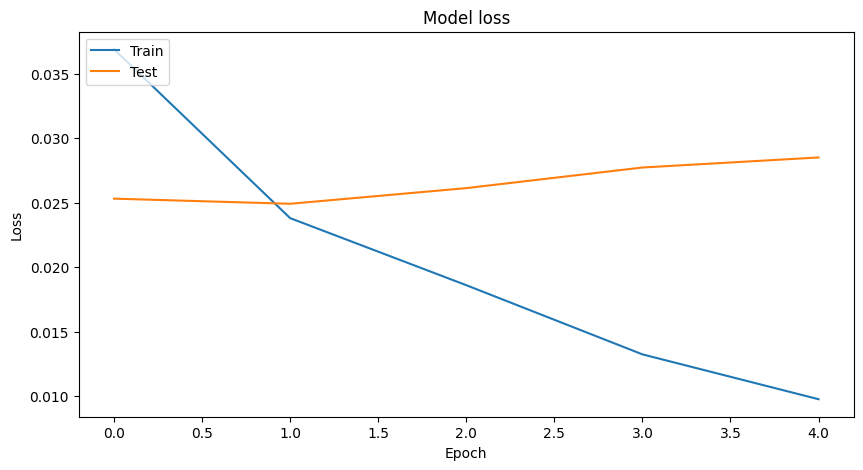

In [43]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [46]:
# Make predictions (example)
user_id_to_predict = 0

# Ensure user_input is a batch (even if of size 1)
user_input = np.array([[user_id_to_predict]])  # Wrap in an extra dimension to create a batch of size 1
book_input = np.arange(len(book_ids))

# Since we want to test each book for the user we need to do this in batches as well.
predicted_ratings = model.predict({'user_input': np.repeat(user_input, len(book_ids), axis=0), 'book_input': book_input})
predicted_ratings

830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.4804696 ],
       [0.8004963 ],
       [0.56945056],
       ...,
       [0.7268191 ],
       [0.47934306],
       [0.7450961 ]], dtype=float32)

In [47]:
users_df['User-ID'].head()

,User-ID
1,2
3,4
5,6
9,10
10,11


In [57]:
import numpy as np
import pandas as pd
from tensorflow import keras

# Get the user and book IDs for User-ID 44
user_id = 99
user_index = merged_df[merged_df['User-ID'] == user_id]['User-ID'].cat.codes.values[0]

# Get all book indices
all_book_indices = np.arange(len(book_ids))

# Find books the user has already rated
rated_books = merged_df[merged_df['User-ID'] == user_id]['ISBN'].cat.codes.values

# Find books the user hasn't rated yet
unrated_books = np.setdiff1d(all_book_indices, rated_books)

# Prepare input data for prediction
user_input = np.full(len(unrated_books), user_index)
book_input = unrated_books

# Predict ratings for unrated books
predicted_ratings = model.predict({'user_input': user_input, 'book_input': book_input}, verbose=0)

# Create a DataFrame of book indices and their predicted ratings
recommendations = pd.DataFrame({'book_index': book_input, 'predicted_rating': predicted_ratings.flatten()})

# Sort recommendations by predicted rating (descending)
recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)

# Get the top 10 book recommendations
top_10_books = recommendations.head(10)

# Map book indices back to ISBNs
top_10_books['ISBN'] = top_10_books['book_index'].map(lambda x: merged_df['ISBN'].cat.categories[x])

# Join with the books data to get book titles
top_10_books = top_10_books.merge(books_df, on='ISBN', how='inner')

# Show top 10 recommended books
top_10_books[['ISBN', 'Book-Title', 'predicted_rating']]


<ipython-input-57-a5d913bf06ab>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_books['ISBN'] = top_10_books['book_index'].map(lambda x: merged_df['ISBN'].cat.categories[x])


,ISBN,Book-Title,predicted_rating
0,0140434267,Pride and Prejudice (Penguin Classics),1.061849
1,0345419081,The Eight,1.051651
2,0812505166,Wuthering Heights,1.042394
3,0451410912,A Killing Gift,1.034378
4,0679734465,Valis,1.033839
5,0590897993,Bat 6,1.033251
6,3458171703,Der Schatten des Windes.,1.027274
7,067154683X,DIARY ANNE FRANK,1.020390
8,0671697994,Brothers in Arms,1.007824
9,0553574353,Helter Skelter: The True Story of the Manson M...,1.006760
